## Analyzing the sales of an e-commerce company for providing actionable insights

# Problem Statement:

### A renowed e-commerece company which is a one-stop shop for office supplies and furniture, has a dataset which contains sales data from their US operations. The dataset includes information such as order details, customer email IDs, geographical information, product categories, sales amounts, quantities, and profits. This company has hired me as data scientist for data analysis. They want to gain insights of their sales patterns, customer behaviour and identify areas for potential optimization and growth.

Link to the data [Click Here](https://www.kaggle.com/datasets/anandshaw2001/amazon-sales-dataset/download?datasetVersionNumber=1)

# Data Exploration
### Loading Required Libraries

In [51]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as mlt
%matplotlib inline
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from itertools import combinations

### Loading the Dataset

In [23]:
sales_data = ps.read_csv("SalesData.csv")

### Reading the Data

In [24]:
sales_data.head(10)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,DarrinVanHuff@gmail.com,Los Angeles,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
5,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5.0,34.47
6,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Tables,Chromcraft Rectangular Conference Tables,1706.18,9.0,85.31
7,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,Los Angeles,Phones,Konftel 250 Conference phone - Charcoal black,911.42,4.0,68.36
8,CA-2013-161389,06-12-2013,11-12-2013,IreneMaddox@gmail.com,Seattle,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3.0,132.59
9,CA-2011-167164,13-05-2011,15-05-2011,AlejandroGrove@gmail.com,West Jordan,Storage,Fellowes Super Stor/Drawer,55.50,2.0,9.99


### Checking the datatypes

In [25]:
sales_data.dtypes

Order ID         object
Order Date       object
Ship Date        object
EmailID          object
Geography        object
Category         object
Product Name     object
Sales           float64
Quantity        float64
Profit          float64
dtype: object

The dataset contains three numerical attributes and seven categorical attributes.

### Checking the dataset dimensions

In [26]:
sales_data.shape

(3203, 10)

The dataset contains 10 columns and 3203 rows.

### Checking for duplicate values

In [27]:
sales_data.duplicated().sum()

0

The dataset does not contain any duplicate values

### Checking the null values

In [28]:
sales_data.isnull().sum()

Order ID        0
Order Date      2
Ship Date       3
EmailID         6
Geography       5
Category        9
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

The dataset contains some null values in 'Order Date', 'Ship Date', 'EmailID', 'Geography' and 'Category. Hence, dataset cleaning is necessary for accurate analysis.

# Data Preprocessing
### Cleaning the dataset

In [29]:
sales_data.dropna(subset=['Order Date', 'Ship Date', 'EmailID'], inplace=True)

print("Null values in 'Order Date':", sales_data['Order Date'].isnull().sum())
print("Null values in 'Ship Date':", sales_data['Ship Date'].isnull().sum())
print("Null values in 'EmailID':", sales_data['EmailID'].isnull().sum())

Null values in 'Order Date': 0
Null values in 'Ship Date': 0
Null values in 'EmailID': 0


The exact values for Order Date, Ship Date and EmailID cannot be predicted as they are very specific, so it is better to drop the null values in this case. 

To handle null values in 'Geography' column, it is suitable to check if there are any repeat orders from same EmailID that have previous 'Geography' values. If previous values are found, the null values in the 'Geography' column will be filled with previous values for that 'EmailID'. If not, the null values will be dropped.

In [30]:
sales_data.sort_values(by='EmailID', inplace=True)

for index, row in sales_data.iterrows():
    if ps.isnull(row['Geography']):
        previous_value = sales_data.loc[sales_data['EmailID'] == row['EmailID'], 'Geography'].dropna().iloc[-1]
        if ps.notnull(previous_value):
            sales_data.at[index, 'Geography'] = previous_value
        else:
            sales_data.drop(index, inplace=True)

sales_data.reset_index(drop=True, inplace=True)

print("Null values in 'Geography':", sales_data['Geography'].isnull().sum())

Null values in 'Geography': 0


This program first sorts the values as per "EmailID" column. After that it iterates each row and checks where the null values are present. After that, it check the previous 'Geography' values and fills the null values associated with the same 'EmailID'. If no any match is found, it will drop the null values.

In [31]:
sales_data.sort_values(by='Product Name', inplace=True)

for index, row in sales_data.iterrows():
    if ps.isnull(row['Category']):
        previous_categories = sales_data.loc[sales_data['Product Name'] == row['Product Name'], 'Category'].dropna()
        if not previous_categories.empty:
            previous_category = previous_categories.iloc[-1]
            sales_data.at[index, 'Category'] = previous_category
        else:
            sales_data.drop(index, inplace=True)

sales_data.reset_index(drop=True, inplace=True)

print("Null values in 'Category':", sales_data['Category'].isnull().sum())

Null values in 'Category': 0


Applying the same logic for dealing with the null values in the category column. The null values will be filled based on previous values associated with the values from 'Product Name' column.

### Checking for outliers

In [32]:
n_cols = ['Sales', 'Quantity', 'Profit']
sales_data[n_cols].describe()

,Sales,Quantity,Profit
count,3187.000000,3187.000000,3187.000000
mean,226.484804,3.829934,33.653602
std,525.019205,2.262430,174.036173
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.980000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


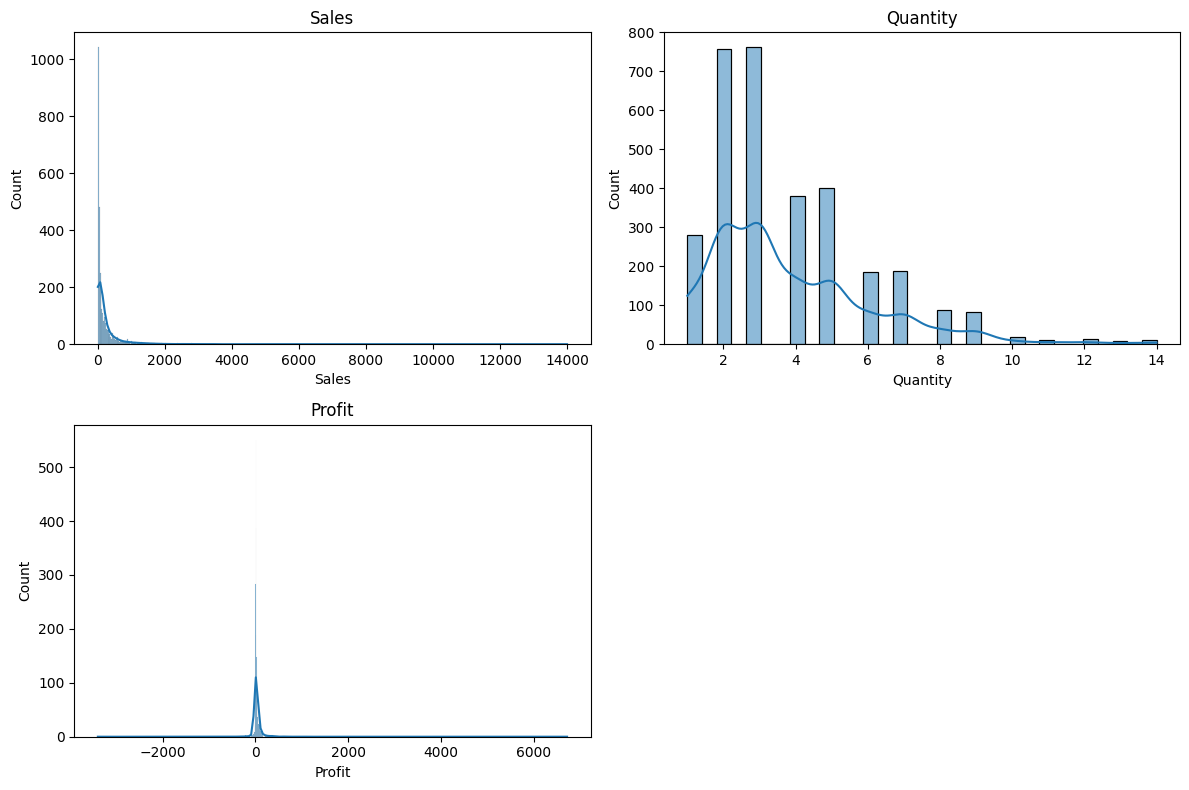

In [33]:
mlt.figure(figsize=(12, 8))
for a, col in enumerate(n_cols):
    mlt.subplot(2, 2, a+1)
    sb.histplot(sales_data[col], kde=True)
    mlt.title(col)
mlt.tight_layout()
mlt.show()

<Figure size 1000x600 with 0 Axes>

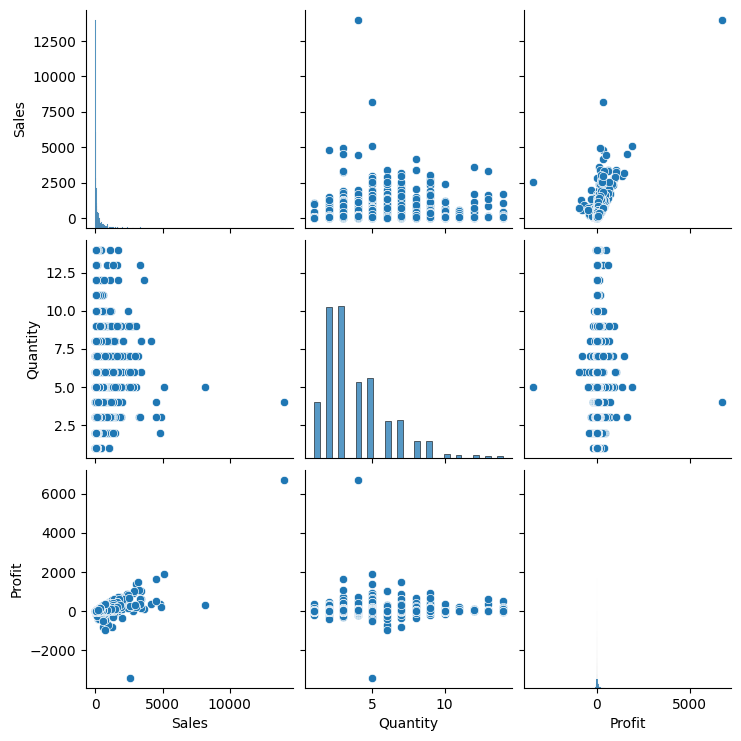

In [34]:
mlt.figure(figsize=(10, 6))
sb.pairplot(sales_data[n_cols]);
mlt.show();

From the graphs, it can be observed that there are some irregularity in the data which shows that, some periods have higher sales than others and some products showing negative profit. These irregularities maybe due to various reasons such as incorrect data collection, seasonal factors, special events such as Black Friday Sale or Cyber Monday Sale. For removing these outliers we need to analyse what is the actual reason for this by conducting additional research and detailed analysis.

## Exploratory Data Analysis

### 1) What is the customer retention rate over time?

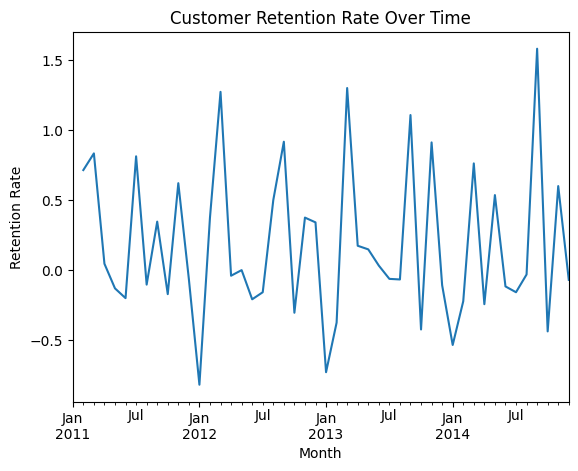

In [35]:
sales_data['Order Date'] = ps.to_datetime(sales_data['Order Date'], format='%d-%m-%Y')

monthly_customers = sales_data.groupby(sales_data['Order Date'].dt.to_period('M'))['EmailID'].nunique()

retention_rate = monthly_customers.pct_change()

retention_rate.plot(kind='line', xlabel='Month', ylabel='Retention Rate', title='Customer Retention Rate Over Time')

mlt.show()

This program first converts the data type of 'Order Date' to datetime type. After that, grouping of data is done by month and the no. of unique customers monthly is calculated. Finally the percentage change in the number of unique customers between consecutive months is calculated which gives the retention rate. 


From the above graph we can see the customer retention rate from 2011 to 2014. The value 1 means all customers were retained over the period of time and the value 0 means none of the customers were retained. While, the negative value indicates that the company has lost the customers within the period. The rate of retention has been increased over the period of time. In January 2011, the rate of retention was close to 0.25. While in July 2014 it was quite higher about 1.25. This means the company has made progress in retaining customers and should keep implementing the things that are currently in action.


### 2) What are the top 10 most profitable and least 10 profitable products?

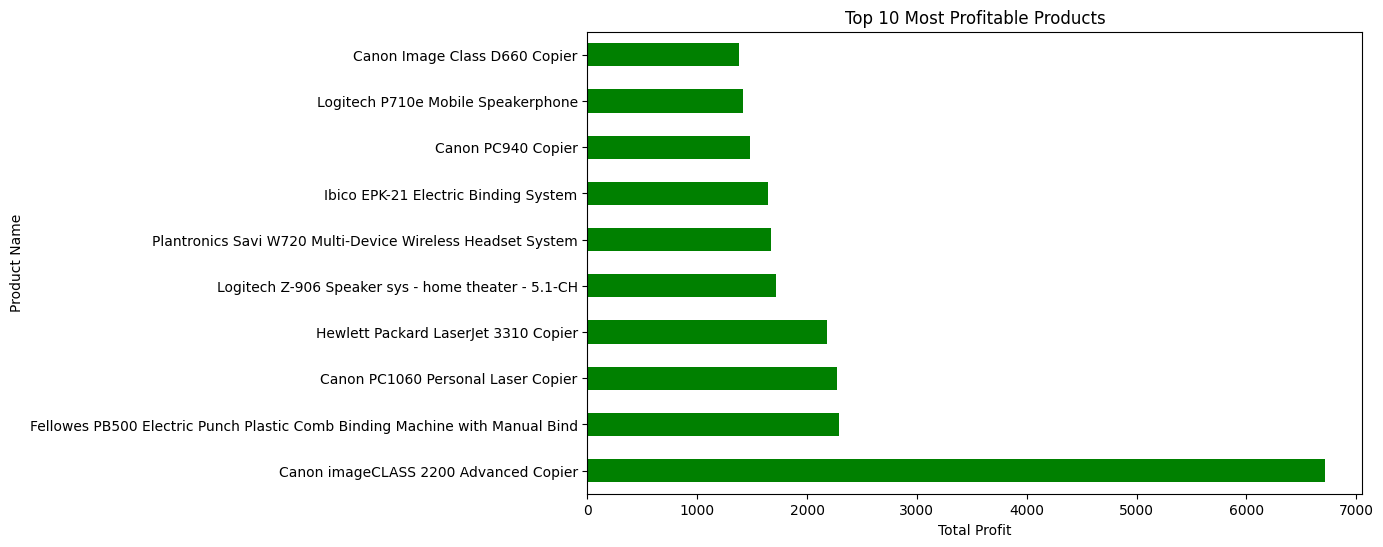

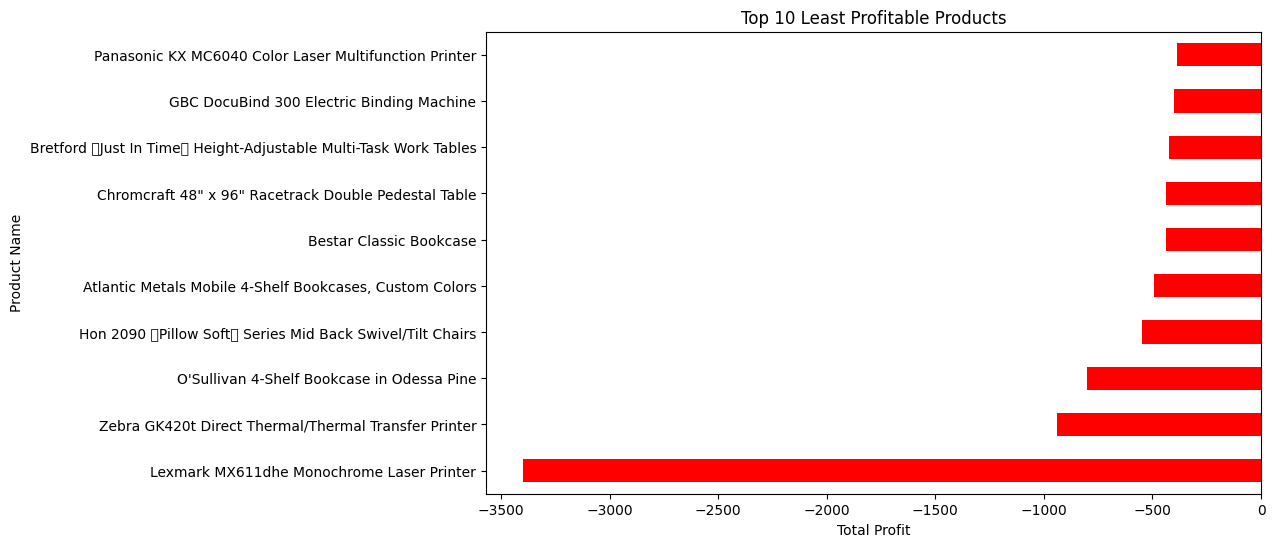

In [36]:
profit = sales_data.groupby('Product Name')['Profit'].sum().sort_values()

top_10 = profit.tail(10)

bottom_10 = profit.head(10)

top_10.plot(kind='barh', color='green', figsize=(10, 6))
mlt.xlabel('Total Profit')
mlt.title('Top 10 Most Profitable Products')
mlt.gca().invert_yaxis()
mlt.show()

bottom_10.plot(kind='barh', color='red', figsize=(10, 6))
mlt.xlabel('Total Profit')
mlt.title('Top 10 Least Profitable Products')
mlt.show()

This program first groups by 'Product Name' and then we estimate the total profit for every item. After that we sort the products based on their total profit in ascending order. After sorting we define two variables specifying top 10 and bottom 10 products. Then we plot the data using bar graphs.

From the graph of Top 10 profitable products, we can observe that 'Canon imageCLASS 2200 Advanced Copier' is the most profitable product. Overall, copiers appear to acquire most spots among top 10 profitable products. 

From the graph of Least 10 profitable products, the product making the least profit is Lexmark MX611dhe Monochrome Laser Printer. One key insight from this graph is that products from Furniture category are making more loss compared to other. So company should look into the reason behind this loss. 

### 3) What is the average order value (AOV) over time?

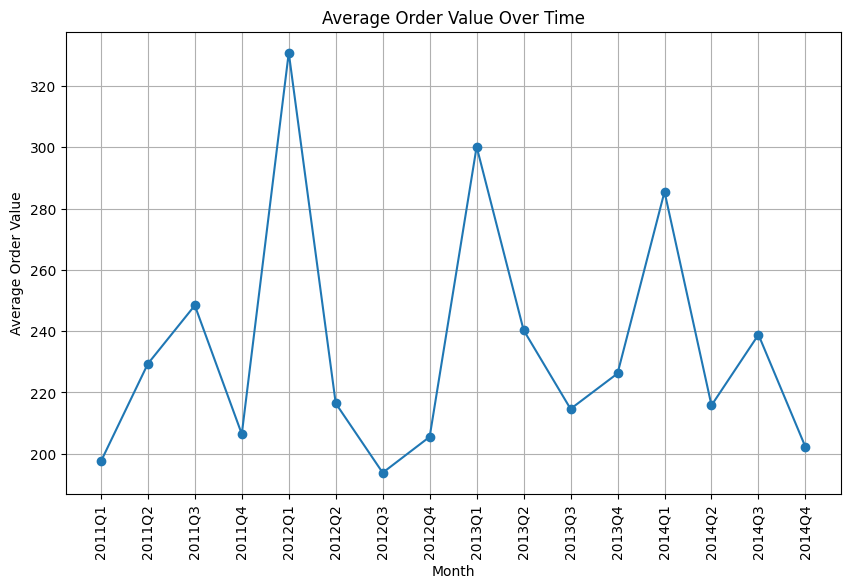

In [44]:
sales_data['Order Date'] = ps.to_datetime(sales_data['Order Date'])

monthly_aov = sales_data.groupby(sales_data['Order Date'].dt.to_period('Q'))['Sales'].mean().reset_index()

monthly_aov['Order Date'] = monthly_aov['Order Date'].astype(str)

mlt.figure(figsize=(10, 6))
mlt.plot(monthly_aov['Order Date'], monthly_aov['Sales'], marker='o')
mlt.title('Average Order Value Over Time')
mlt.xlabel('Month')
mlt.ylabel('Average Order Value')
mlt.xticks(rotation=90)
mlt.grid(True)
mlt.show()

This program first converts 'Order Date' to datetime format. Then data is grouped by month and mean sales for each month is calculated. After calculating this, the 'Order Date' column is converted into 'string' format as it is necessary for plotting the data using Plotly. 

From the graph it can be observed that average order value (AOV) is increasing over time. The average value was around 150 USD in January 2011. The average value has risen to 450 USD in July 2014. From this we can conclude that customers are spending more money per order than before. Hence, the company is successful in increasing its AOV over time.

### 4) What measures should we take regarding inventory levels based on sales volumes for different months?

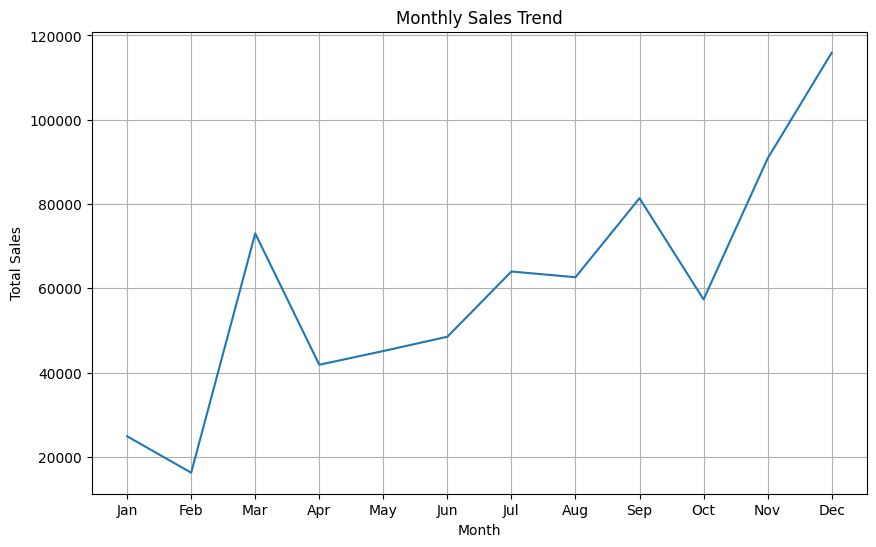

In [48]:
sales_data['Month'] = sales_data['Order Date'].dt.month
m_sls = sales_data.groupby('Month')['Sales'].sum()

mlt.figure(figsize=(10, 6))
sb.lineplot(x=m_sls.index, y=m_sls.values)
mlt.title('Monthly Sales Trend')
mlt.xlabel('Month')
mlt.ylabel('Total Sales')
mlt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
mlt.grid(True)
mlt.show()

The program first creates a new 'Month' column by taking the month component from 'Order Date' column. Then a new variable named 'monthly_sales' is created by grouping the sales_data by 'Month' column and sum of sales for each month is calculated. Then this data is plotted using a line graph which shows the monthly sales trend.

From the monthly sales trend graph, I suggest that the company should increase inventory levels in the months of September and October as the sales are very high due to festive season. On the other hand, company should decrease the inventory levels in the months of January and February as sales are lowest. This will help the company reduce storage costs in low-demand months and avoid stockouts during peak sales months.

### 5) How do the seasonal trends in product sales vary for various categories across top five geograhical regions with highest sales? 

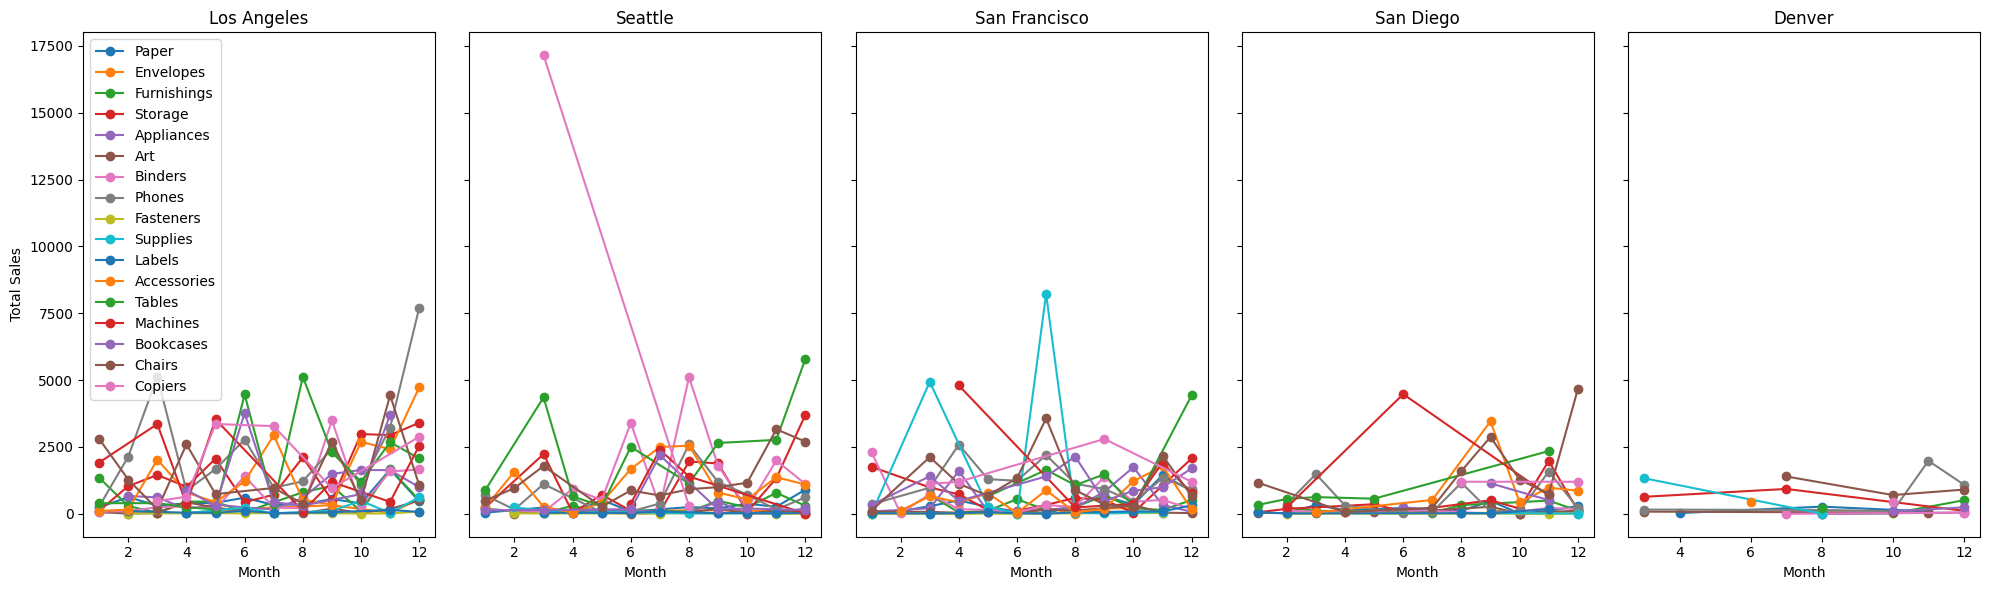

In [49]:
top_five = sales_data.groupby('Geography')['Sales'].sum().nlargest(5).index

filtered_data = sales_data[sales_data['Geography'].isin(top_five)]

categories = filtered_data['Category'].unique()

plot_data = pd.DataFrame()

for category in categories:
    for geo in top_five:
        subset = filtered_data[(filtered_data['Category'] == category) & (filtered_data['Geography'] == geo)]
        m_sls = subset.groupby('Month')['Sales'].sum().reset_index()
        m_sls['Category'] = category
        m_sls['Geography'] = geo
        plot_data = pd.concat([plot_data, m_sls], ignore_index=True)

fig, axs = mlt.subplots(nrows=1, ncols=len(top_five), figsize=(20, 6), sharey=True)

for i, geo in enumerate(top_five):
    geo_data = plot_data[plot_data['Geography'] == geo]
    for category in categories:
        category_data = geo_data[geo_data['Category'] == category]
        axs[i].plot(category_data['Month'], category_data['Sales'], marker='o', label=category)
    axs[i].set_title(geo)
    axs[i].set_xlabel('Month')

axs[0].set_ylabel('Total Sales')

axs[0].legend()

mlt.tight_layout()
mlt.show()

This program first identifies the top 5 geographies with highet sales by grouping the dataset by 'Geography' and calculating the sum of 'Sales'. Then it specifies the unique product categories from filtered data. After that the new dataset is created, it subsets the filtered data to include data only for that category and geography. It then calculates total monthly sales and finally adds column of 'Category' and 'Geography' to the the new dataframe.

From this graph we can see the top 5 geographies with Highest sales, highest being Los Angeles followed by Seattle, San Francisco, San Diego and lowest is Denver. In Los Angeles and San Francisco, the distribution of sales across each category is nearly equal. But in Seattle and San Diego, few categories have higher sales compared to others. In Denver, only a few categories are in high demand. The company should try to promote categories whose sales are low in respective area accordingly to attract more sales and eventually profit. 

### 6) How can we form cross-selling strategies from product combinations which are frequently purchased together? 

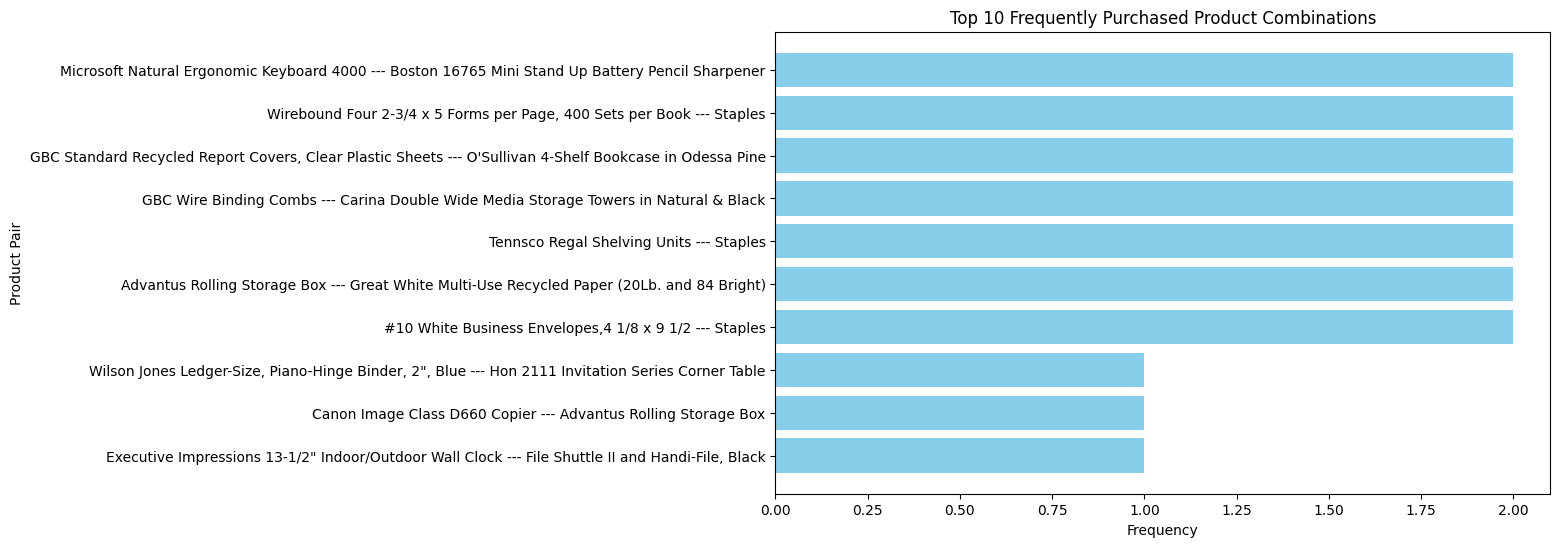

In [52]:
unique_products = sales_data.groupby('Order ID')['Product Name'].apply(set)

coc_counts = {}
for products in unique_products:
    for product_pair in combinations(products, 2):
        coc_counts[product_pair] = coc_counts.get(product_pair, 0) + 1

coc_df = pd.DataFrame(coc_counts.items(), columns=['Product Pair', 'Frequency'])

coc_df = coc_df.sort_values(by='Frequency', ascending=False)

coc_df[['Product 1', 'Product 2']] = ps.DataFrame(coc_df['Product Pair'].tolist(),index=coc_df.index)

top_pairs = coc_df.head(10)

mlt.figure(figsize=(10, 6))
mlt.barh(top_pairs['Product 1'] + ' --- ' + top_pairs['Product 2'], top_pairs['Frequency'], color='skyblue')
mlt.xlabel('Frequency')
mlt.ylabel('Product Pair')
mlt.title('Top 10 Frequently Purchased Product Combinations')
mlt.gca().invert_yaxis()
mlt.show()

This program first imports 'combinations' from 'itertools' module to find unique product combinations. It starts by converting the list of products in each order into a set by grouping the dataset by 'Order ID' column. It then calculates co-occurence frequency of product pairs. After this, it creates a dataframe 'coc_df' and stores the values of product pairs and frequencies. Finally it sorts the dataframe in descending order and plots the top 10 frequently purchased product combinations.

From the bar graph we can see the top 10 frequntly purchase product combinations. Some combination seem to be complementary like Envelopes and Binding Combs but others like binders and corner tables are not. This suggests that customers may be pruchasing them for different purposes. 
So the company should find out the reasons behind these and develop cross-selling strategies based on specific segments and combinations.


### 7) What is the average customer lifetime value based on their purchase history, demographics, and geographical location?

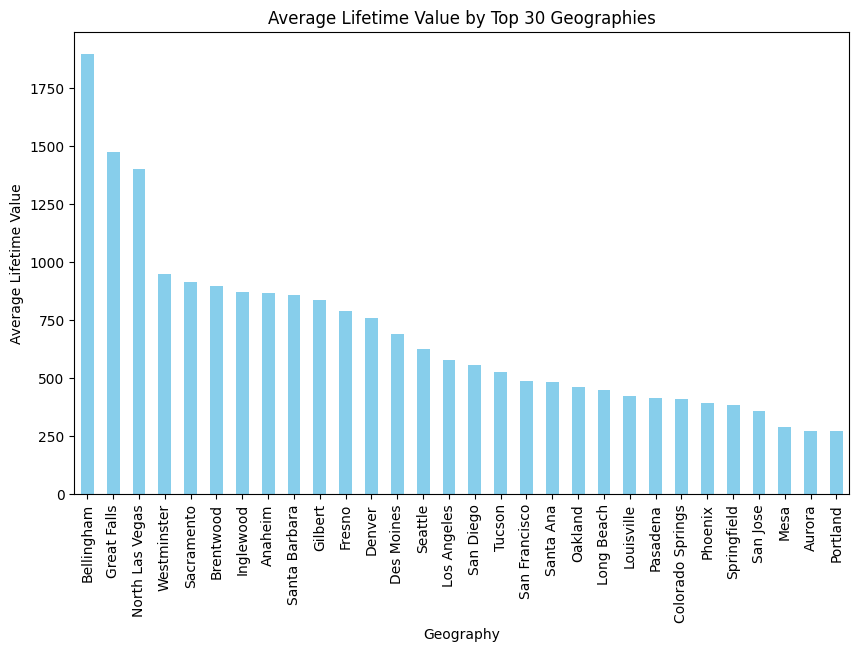

In [54]:
clv = sales_data.groupby('EmailID')['Sales'].sum()

clv_by_geo = sales_data.groupby('Geography')['Sales'].sum()

segmented_clv = sales_data.groupby(['Geography', 'EmailID'])['Sales'].sum().reset_index()
average_clv= segmented_clv.groupby('Geography')['Sales'].mean()

top_geo = clv_by_geo.nlargest(30).index

avg_clv_top = average_clv.loc[top_geo]
avg_clv_top = avg_clv_top.sort_values(ascending=False)

mlt.figure(figsize=(10, 6))
avg_clv_top.plot(kind='bar', color='skyblue')
mlt.xlabel('Geography')
mlt.ylabel('Average Lifetime Value')
mlt.title('Average Lifetime Value by Top 30 Geographies')
mlt.xticks(rotation=90)
mlt.show()

This program firsts calculates the total sales for each customer by grouping the data by 'EmailID'. Then total sales are aggregated for each geography by grouping the data based on geography. After this, the data is segmented by geography and emailId, then average customer lifetime value for each geography is calculated. Finally, top 30 geographies with highest values are selected and plotted using bar plot.

From the graph we can see that average customer lifetime value (ACLV) is highest in Bellingham followed by Great Falls, North Las Vegas, Westminster and so on. The company can plan to invest more and expand there business in these areas. But it is essential to find out the reasons behind the high values. Also company should mesaure the potential rewards against risks involved before coming up with regional strategies. On the other hand, for the areas with low ACLV, the company should study what are the causes for low ACLV and try to see whether there are opportunities for improvement or expnasion.

## Conclusion

#### By looking at the analysis of sales data, we can observe which products are performing well, customer preferences and what trend is going on in the market. By using these insights, the company can streamline its daily operations, increase customer satisfaction and accomplish the goal of seeing the business grow. 

#### The company should get better at managing inventory, work on some target marketing strategies and continue to maintain relationships with its customers.

#### Additionally, the company needs to find ways to make recommendations for additional products the customers can purchase and get repeat customers. 

